# Entrenamientos



Importo librerias utiles

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [4]:
act = pd.read_csv("../running.csv")

act.shape

(222, 41)

Tenemos 222 registros con 41 features para cada uno. Esto es, 222 actividades con 41 caracteristicas.

In [5]:
act.sample(5)

,Tipo de actividad,Fecha,Favorito,Título,Distancia,Calorías,Tiempo,Frecuencia cardiaca media,FC máxima,Cadencia de carrera media,...,Ritmo máximo de respiración,Cambio en estrés,Inicio del periodo de estrés,Fin del periodo de estrés,Estrés medio,Estrés máximo,Tiempo en movimiento,Tiempo transcurrido,Altura mínima,Altura máxima
148,Carrera,2023-08-08 16:16:13,False,Ciudad de Buenos Aires - 50' z1 z2,7.73,564,00:50:02,139,156,166,...,--,--,--,--,--,--,00:49:52,00:50:02,-3,57
63,Carrera,2024-02-22 19:06:40,False,Ciudad de Buenos Aires - 6x500/1'30,7.96,697,00:51:05,168,200,138,...,--,--,--,--,--,--,00:44:57,00:51:43,-5,31
116,Carrera,2023-10-17 19:22:47,False,Ciudad de Buenos Aires - 60' CON 30' DE CUESTAS,10.47,790,01:00:07,161,183,165,...,--,--,--,--,--,--,00:59:41,01:02:22,4,37
215,Carrera,2023-02-22 20:03:17,False,Ciudad de Buenos Aires - Repeticiones: ritmo o...,7.83,671,00:56:45,164,189,125,...,--,--,--,--,--,--,00:49:33,00:59:59,-1,35
43,Carrera,2024-04-10 19:02:06,False,Ciudad de Buenos Aires - CUESTAS. 3x (4x30),10.11,828,01:02:54,162,192,155,...,--,--,--,--,--,--,01:00:51,01:13:59,-6,36


Inspeccionemos las columnas. Desde ya vemos que hay un problema en el formato. Contienen espacios en blanco, no estan en minusculas y poseen letras con tildes. Esto resulta fastidioso a la hora de acceder a los datos. Para hacerlo mas sencillo vamos a pasar los nombres a formato **snake_case**.

Llevo los nombres a minuscula, reemplazo las letras con tildes por las mismas sin y reemplazo los espacios en blanco por guiones bajos.

In [6]:
act.columns

Index(['Tipo de actividad', 'Fecha', 'Favorito', 'Título', 'Distancia',
       'Calorías', 'Tiempo', 'Frecuencia cardiaca media', 'FC máxima',
       'Cadencia de carrera media', 'Cadencia de carrera máxima',
       'Ritmo medio', 'Ritmo óptimo', 'Ascenso total', 'Descenso total',
       'Longitud media de zancada', 'Relación vertical media',
       'Oscilación vertical media', 'Tiempo medio de contacto con el suelo',
       'Training Stress Score®', 'Dificultad', 'Fluidez', 'Swolf medio',
       'Velocidad media de palada', 'Repeticiones totales', 'Descompresión',
       'Mejor tiempo de vuelta', 'Número de vueltas', 'Temperatura máxima',
       'Ritmo respiratorio medio', 'Ritmo mínimo de respiración',
       'Ritmo máximo de respiración', 'Cambio en estrés',
       'Inicio del periodo de estrés', 'Fin del periodo de estrés',
       'Estrés medio', 'Estrés máximo', 'Tiempo en movimiento',
       'Tiempo transcurrido', 'Altura mínima', 'Altura máxima'],
      dtype='object')

In [7]:
# Diccionario con mapeo para reemplazar.
to_replace = {"á":"a","é":"e","í":"i","ó":"o","ú":"u","ñ":"n"}
patron = re.compile('|'.join(to_replace.keys())) # [á|é|í|ó|ú|ñ]

def to_snake_case(col_name):
    # Cambio nombre de las columnas. Llevo a minusculas, reemplazo espacios en blanco por _ y letras con tildes por las mismas sin.
    col_name  = col_name.lower().replace(" ","_")
    matches = patron.findall(col_name) # Busco si la columna contiene letras con tildes. Si hay match reemplazo.
    if matches:
        for match in set(matches):
            col_name = col_name.replace(match,to_replace[match])
    return col_name    

In [8]:
act.columns = [to_snake_case(col) for col in act.columns]
act.columns

Index(['tipo_de_actividad', 'fecha', 'favorito', 'titulo', 'distancia',
       'calorias', 'tiempo', 'frecuencia_cardiaca_media', 'fc_maxima',
       'cadencia_de_carrera_media', 'cadencia_de_carrera_maxima',
       'ritmo_medio', 'ritmo_optimo', 'ascenso_total', 'descenso_total',
       'longitud_media_de_zancada', 'relacion_vertical_media',
       'oscilacion_vertical_media', 'tiempo_medio_de_contacto_con_el_suelo',
       'training_stress_score®', 'dificultad', 'fluidez', 'swolf_medio',
       'velocidad_media_de_palada', 'repeticiones_totales', 'descompresion',
       'mejor_tiempo_de_vuelta', 'numero_de_vueltas', 'temperatura_maxima',
       'ritmo_respiratorio_medio', 'ritmo_minimo_de_respiracion',
       'ritmo_maximo_de_respiracion', 'cambio_en_estres',
       'inicio_del_periodo_de_estres', 'fin_del_periodo_de_estres',
       'estres_medio', 'estres_maximo', 'tiempo_en_movimiento',
       'tiempo_transcurrido', 'altura_minima', 'altura_maxima'],
      dtype='object')

Veamos ahora que tipo de actividades hay registradas.

In [9]:
act.tipo_de_actividad.value_counts()

tipo_de_actividad
Carrera                   219
Ciclismo                    1
Entrenamiento en cinta      1
Trabajo de respiración      1
Name: count, dtype: int64

Voy a quedarme solo con las carreras.

In [10]:
run = act[act.tipo_de_actividad == "Carrera"]

In [11]:
run.iloc[0] # Inspecciono un registro para ver que datos trae.

tipo_de_actividad                                                      Carrera
fecha                                                      2024-07-31 19:23:59
favorito                                                                 False
titulo                                   Ciudad de Buenos Aires - 3x1k /3' Vo2
distancia                                                                 9.02
calorias                                                                   717
tiempo                                                                00:50:41
frecuencia_cardiaca_media                                                  166
fc_maxima                                                                  195
cadencia_de_carrera_media                                                  165
cadencia_de_carrera_maxima                                                 248
ritmo_medio                                                               5:37
ritmo_optimo                                        

Muchas columnas estan repletas de NaN, afortunadamente la mayoria no son de interes (salvo dificultad) por lo que las voy a borrar.


Me armo un array con los indices de las columnas que quiero mantener.

In [12]:
for index, colname in enumerate(act.columns):
    print(index, colname)

0 tipo_de_actividad
1 fecha
2 favorito
3 titulo
4 distancia
5 calorias
6 tiempo
7 frecuencia_cardiaca_media
8 fc_maxima
9 cadencia_de_carrera_media
10 cadencia_de_carrera_maxima
11 ritmo_medio
12 ritmo_optimo
13 ascenso_total
14 descenso_total
15 longitud_media_de_zancada
16 relacion_vertical_media
17 oscilacion_vertical_media
18 tiempo_medio_de_contacto_con_el_suelo
19 training_stress_score®
20 dificultad
21 fluidez
22 swolf_medio
23 velocidad_media_de_palada
24 repeticiones_totales
25 descompresion
26 mejor_tiempo_de_vuelta
27 numero_de_vueltas
28 temperatura_maxima
29 ritmo_respiratorio_medio
30 ritmo_minimo_de_respiracion
31 ritmo_maximo_de_respiracion
32 cambio_en_estres
33 inicio_del_periodo_de_estres
34 fin_del_periodo_de_estres
35 estres_medio
36 estres_maximo
37 tiempo_en_movimiento
38 tiempo_transcurrido
39 altura_minima
40 altura_maxima


In [13]:
indices = np.array((1,3,4,5,6,7,8,11,13,14,39,40))
act.columns.values[indices]

array(['fecha', 'titulo', 'distancia', 'calorias', 'tiempo',
       'frecuencia_cardiaca_media', 'fc_maxima', 'ritmo_medio',
       'ascenso_total', 'descenso_total', 'altura_minima',
       'altura_maxima'], dtype=object)

In [14]:
run = run[run.columns.values[indices]]
run.shape

(219, 12)

Pasamos de 41 columnas a 12. Y de 222 actividades a 219.

Veamos ahora que tipo de datos se almacenan en estas columnas.

In [15]:
run.dtypes

fecha                        object
titulo                       object
distancia                    object
calorias                     object
tiempo                       object
frecuencia_cardiaca_media     int64
fc_maxima                     int64
ritmo_medio                  object
ascenso_total                object
descenso_total               object
altura_minima                object
altura_maxima                object
dtype: object

Tengo que transformar varios tipos.

 - A date --> fecha
 - A time --> tiempo, ritmo_medio, tiempo_en_movimiento, tiempo_transcurrido
 - A float/int --> distancia, calorias, ascenso_total, descenso_total, altura_minimia, altura_maxima

Arranco por la fecha. Para trabajar con fechas ~importo datetime~ uso el tipo da dato datetime de pandas.

In [16]:
run.fecha = pd.to_datetime(run.fecha, format="%Y-%m-%d %H:%M:%S")
run.fecha

0     2024-07-31 19:23:59
1     2024-07-26 18:57:16
2     2024-07-24 18:12:00
3     2024-07-21 19:04:20
4     2024-07-19 17:31:37
              ...        
217   2023-02-16 19:34:51
218   2023-02-14 20:21:18
219   2023-02-11 20:23:02
220   2023-02-09 19:32:05
221   2023-02-07 20:04:40
Name: fecha, Length: 219, dtype: datetime64[ns]

Algo que podemos hacer ahora es crear columnas para anio, mes y dia. Nos valemos de la fecha para ello.

In [17]:
run['anio'] = run.fecha.apply(lambda x: x.year)
run['mes'] = run.fecha.apply(lambda x: x.month)
run['dia'] = run.fecha.apply(lambda x: x.day)

run.columns

Index(['fecha', 'titulo', 'distancia', 'calorias', 'tiempo',
       'frecuencia_cardiaca_media', 'fc_maxima', 'ritmo_medio',
       'ascenso_total', 'descenso_total', 'altura_minima', 'altura_maxima',
       'anio', 'mes', 'dia'],
      dtype='object')

In [18]:
run[["fecha","anio","mes","dia"]].sample(5)

,fecha,anio,mes,dia
42,2024-04-12 19:11:49,2024,4,12
199,2023-03-28 16:51:43,2023,3,28
72,2024-02-04 19:13:59,2024,2,4
143,2023-08-19 15:52:19,2023,8,19
103,2023-11-16 08:17:22,2023,11,16


Sigo con los tiempos, el metodo es el mismo solo que ahora me quedo con el time.

In [19]:
pd.to_datetime(run.tiempo, format = "%H:%M:%S").dt.time

ValueError: unconverted data remains when parsing with format "%H:%M:%S": ".1", at position 64. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Hay alguna entrada que esta mal formateada. Al parecer tienen mas que segundos. Si en teoria vienen en formato 
HH:MM:SS, podemos filtrar por alguna cadena de longitud mayor a 8. Creo una mascara booleana para obtener los registros con longitud mayor a 8 y filtro con ella.

In [21]:
mask = run.tiempo.apply(len) > 8
mask.sum()

np.int64(1)

In [22]:
run.loc[mask]

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia
64,2024-02-21 07:56:20,Ciudad de Buenos Aires Carrera,1.64,93,00:06:19.1,165,198,3:52,9,10,8,18,2024,2,21


In [23]:
run.loc[mask,"tiempo"] = "00:06:19"

Ahora si convierto.

In [24]:
run["tiempo_timedelta"] = pd.to_timedelta(run.tiempo)

In [25]:
run["ritmo_medio_timedelta"] = pd.to_timedelta(run.ritmo_medio, format="%M:%S")

TypeError: to_timedelta() got an unexpected keyword argument 'format'

In [ ]:
run.ritmo_medio = run.ritmo_medio.apply(lambda x: datetime.datetime.strptime(x, "%M:%S").time())

run.tiempo = run.tiempo.apply(lambda x: datetime.datetime.strptime(x, "%H:%M:%S").time())

Ahora convierto a enteros o flotantes. Las columnas a transformar eran:

distancia, calorias, ascenso_total, descenso_total, altura_minimia, altura_maxima.

In [26]:
run.distancia = run.distancia.apply(float)
run.ascenso_total = run.ascenso_total.apply(int)
run.altura_minima = run.altura_minima.apply(int)
run.altura_maxima = run.altura_maxima.apply(int)

Y las siguientes dos arrojan errores. Ambas por mal formateo

In [27]:
run.descenso_total.apply(float) # --

ValueError: could not convert string to float: '--'

In [28]:
mask = run.descenso_total == "--"
run[mask]

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia,tiempo_timedelta
221,2023-02-07 20:04:40,Junín - Benchmark Run,1.68,130,00:09:00,178,190,5:21,2,--,68,76,2023,2,7,0 days 00:09:00


In [29]:
run.loc[mask,"descenso_total"] = "0"

run.descenso_total.apply(float)

0       66.0
1      125.0
2      167.0
3      118.0
4       70.0
       ...  
217      8.0
218     15.0
219     42.0
220     15.0
221      0.0
Name: descenso_total, Length: 219, dtype: float64

In [30]:
run.calorias.apply(int) # ,

ValueError: invalid literal for int() with base 10: '1,235'

In [32]:
run.calorias = run.calorias.apply(lambda x: int(x.replace(",","")))

AttributeError: 'int' object has no attribute 'replace'

In [33]:
run.dtypes

fecha                         datetime64[ns]
titulo                                object
distancia                            float64
calorias                               int64
tiempo                                object
frecuencia_cardiaca_media              int64
fc_maxima                              int64
ritmo_medio                           object
ascenso_total                          int64
descenso_total                        object
altura_minima                          int64
altura_maxima                          int64
anio                                   int64
mes                                    int64
dia                                    int64
tiempo_timedelta             timedelta64[ns]
dtype: object

In [39]:
run.isna().sum()

fecha                        0
titulo                       0
distancia                    0
calorias                     0
tiempo                       0
frecuencia_cardiaca_media    0
fc_maxima                    0
ritmo_medio                  0
ascenso_total                0
descenso_total               0
altura_minima                0
altura_maxima                0
anio                         0
mes                          0
dia                          0
tiempo_timedelta             0
dtype: int64

# Visualizacion


Ahora si. Podemos visualizar los datos. Comenzamos visualizando la cantidad de entrenamientos por anio.

### Bar plot

Cantidad de entrenamientos por anio

In [43]:
runs_by_year = run.anio.value_counts(dropna=False)
runs_by_year

anio
2023    134
2024     85
Name: count, dtype: int64

In [61]:
print(f'Hay una diferencia de {runs_by_year[2023] - runs_by_year[2024]} entrenamientos entre 2023 y 2024')

Hay una diferencia de 49 entrenamientos entre 2023 y 2024


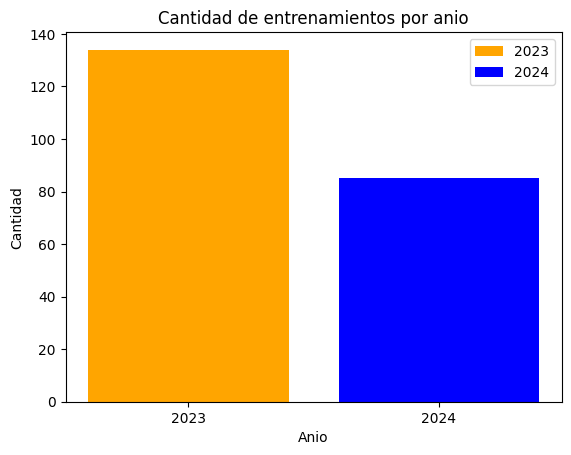

In [55]:
years=['2023','2024']
color_dict = {2023:'orange',2024:'blue'}

fig, ax = plt.subplots()

ax.bar(x=years, height = runs_by_year.values, color=color_dict.values(), label = color_dict.keys())
ax.set_title("Cantidad de entrenamientos por anio")
ax.set_xlabel("Anio")
ax.set_ylabel("Cantidad")
ax.legend()
plt.show()

### Pie chart

Cantidad de entrenamientos por anio. Necesito los porcentajes del total para cada anio.

In [56]:
total_runs = run.shape[0]
percentage_run_by_year = round(run.anio.value_counts() / total_runs,3) * 100
print(percentage_run_by_year)

anio
2023    61.2
2024    38.8
Name: count, dtype: float64


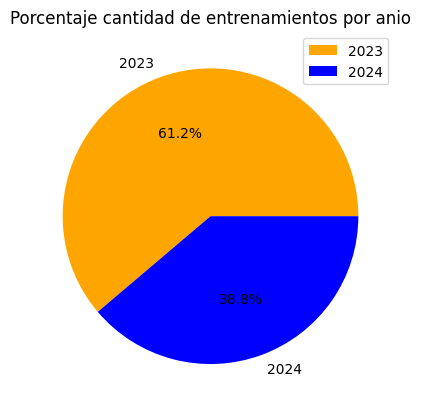

In [57]:
sizes = percentage_run_by_year.values
fig, ax = plt.subplots()
ax.pie(sizes,labels = years,autopct='%1.1f%%', colors = color_dict.values())
ax.set_title('Porcentaje cantidad de entrenamientos por anio')
ax.legend()
plt.show()

Veamos la cantidad de entrenamientos por mes y anio.

In [58]:
run_by_month_year = run.pivot_table('titulo',index='mes',columns='anio', aggfunc="count", fill_value=0)
run_by_month_year

anio,2023,2024
mes,,
1,0,11
2,10,14
3,12,14
4,8,10
5,3,11
6,17,13
7,17,12
8,17,0
9,12,0


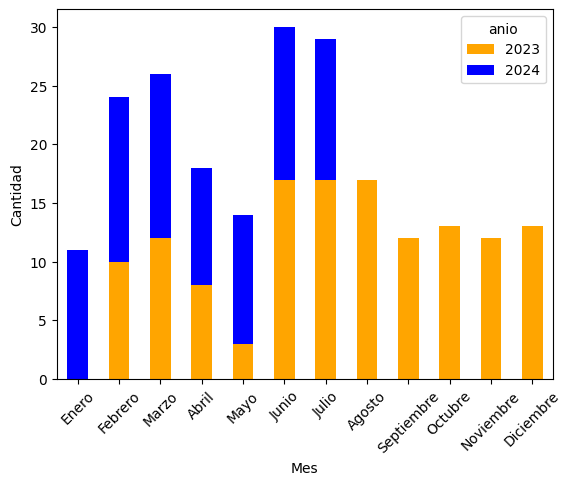

In [59]:
months_in_spanish = [
    "Enero", 
    "Febrero", 
    "Marzo", 
    "Abril", 
    "Mayo", 
    "Junio", 
    "Julio", 
    "Agosto", 
    "Septiembre", 
    "Octubre", 
    "Noviembre", 
    "Diciembre"
]
run_by_month_year.index = months_in_spanish
run_by_month_year.plot.bar(stacked=True, rot=45, xlabel="Mes", ylabel="Cantidad", color = color_dict.values())
plt.show()
# Agregar labels

### Kilometros por anio


Veamos cuantos kilometros corri a lo largo de cada anio.

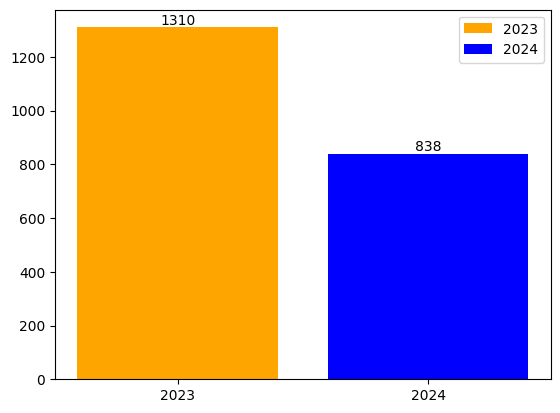

In [62]:
kms_per_year = round(run.groupby('anio').aggregate({'distancia':'sum'}).distancia)

fig, ax = plt.subplots()

for anio, kilometros in kms_per_year.items():
    b = ax.bar(str(anio), kilometros, label = anio, color = color_dict[anio])
    ax.bar_label(b, label_type='edge')

ax.legend()
plt.show()

Y ahora veamos kilometros por mes y anio

In [63]:
kms_per_month_year = run.pivot_table('distancia', index = 'mes', columns = 'anio', aggfunc='sum', fill_value=0)
kms_per_month_year

anio,2023,2024
mes,,
1,0.00,87.41
2,74.94,123.59
3,103.56,114.96
4,95.02,120.38
5,21.03,109.53
6,129.19,142.11
7,190.31,140.39
8,197.11,0.00
9,145.32,0.00


In [66]:
kms_per_month_year.index = months_in_spanish

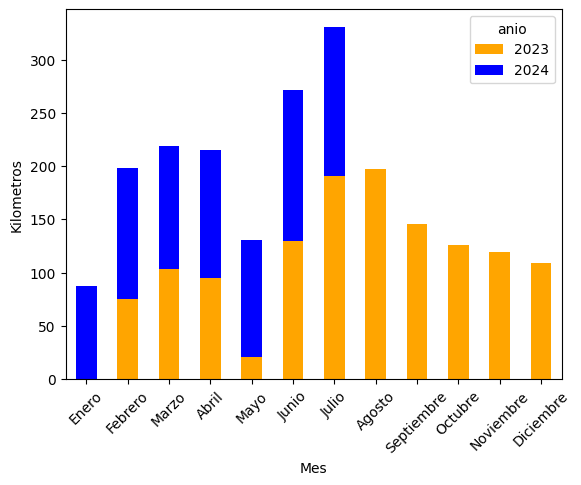

In [67]:
kms_per_month_year.plot.bar(stacked=True, rot=45, xlabel="Mes", ylabel="Kilometros", color = color_dict.values())
plt.show()
# Agregar labels sobre las barras.

Puedo hacerlo por separado..

In [68]:
kms_per_month_2023 = kms_per_month_year[2023]
kms_per_month_2024 = kms_per_month_year[2024]

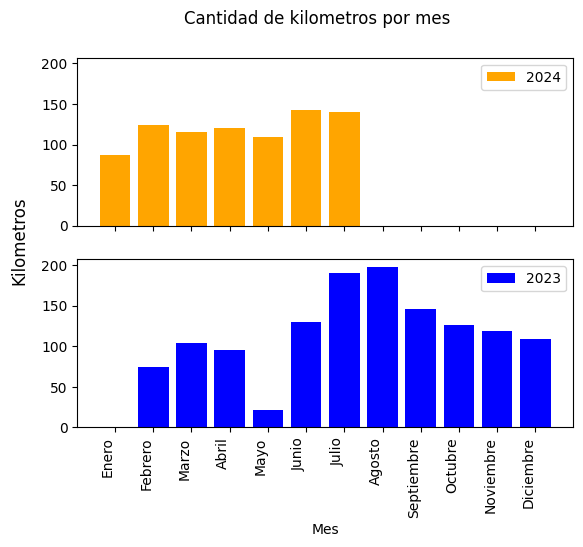

In [70]:
fig, ax = plt.subplots(2, sharex=True, sharey=True)

fig.supylabel('Kilometros')
fig.suptitle('Cantidad de kilometros por mes')

ax[0].bar(x = kms_per_month_2024.index, height = kms_per_month_2024.values, color=color_dict[2023], label = '2024')
ax[0].legend()

ax[1].bar(x = kms_per_month_2024.index, height = kms_per_month_2023.values, color=color_dict[2024], label = '2023')
ax[1].legend()
ax[1].set_xticks(range(len(kms_per_month_2024.index)))
ax[1].set_xticklabels(kms_per_month_2024.index,rotation=90, ha="right")
ax[1].set_xlabel('Mes')
plt.show()

### Agosto 2023



In [71]:
run.mes == 8
run.anio == 2023

agosto_2023 = run[ (run.mes == 8) & (run.anio == 2023) ]
agosto_2023

,fecha,titulo,distancia,calorias,tiempo,frecuencia_cardiaca_media,fc_maxima,ritmo_medio,ascenso_total,descenso_total,altura_minima,altura_maxima,anio,mes,dia,tiempo_timedelta
136,2023-08-31 14:50:00,Ciudad de Buenos Aires - 40' reg + 4x20 prog,7.62,585,00:45:24,154,174,5:58,109,113,-2,35,2023,8,31,0 days 00:45:24
137,2023-08-29 08:13:31,Ciudad de Buenos Aires - 40' regenerativos,5.15,362,00:40:04,122,139,7:47,100,100,4,25,2023,8,29,0 days 00:40:04
138,2023-08-27 07:09:57,Ciudad de Buenos Aires Carrera,21.31,1543,01:52:41,161,185,5:17,336,336,-3,55,2023,8,27,0 days 01:52:41
139,2023-08-26 15:14:48,Ciudad de Buenos Aires - 15' reg + 4 prog,3.31,255,00:20:13,152,173,6:07,62,61,4,36,2023,8,26,0 days 00:20:13
140,2023-08-24 18:53:24,Ciudad de Buenos Aires - 30' suaves,4.91,358,00:30:02,147,167,6:07,99,103,5,39,2023,8,24,0 days 00:30:02
141,2023-08-23 15:38:43,Ciudad de Buenos Aires - 5x200 /30,6.14,473,00:35:52,159,181,5:50,98,100,4,36,2023,8,23,0 days 00:35:52
142,2023-08-21 19:32:22,Ciudad de Buenos Aires - 1x1k/1' + 2x500/30,6.23,460,00:35:47,156,186,5:45,102,91,6,38,2023,8,21,0 days 00:35:47
143,2023-08-19 15:52:19,Junín - 50' prog con cuestas,8.17,633,00:50:04,156,169,6:08,23,25,74,90,2023,8,19,0 days 00:50:04
144,2023-08-17 19:22:44,Ciudad de Buenos Aires - 12k cambios de ritmo,15.77,1237,01:26:18,177,194,5:28,181,186,1,38,2023,8,17,0 days 01:26:18
145,2023-08-15 19:04:14,Ciudad de Buenos Aires - 8x1k/1',13.36,1039,01:14:23,172,192,5:34,178,184,4,38,2023,8,15,0 days 01:14:23


In [72]:
cantidad_entrenos_agosto_2023 = agosto_2023.shape[0]
km_agosto_2023 = agosto_2023.distancia.sum()
tiempo_agosto_2023 = round(agosto_2023.tiempo_timedelta.sum().seconds / 3600)
promedio_tiempo_agosto_2023 = round(agosto_2023.tiempo_timedelta.mean().seconds / 3600, 2)
promedio_kilometros_agosto_2023 = round(agosto_2023.distancia.mean(),2)

In [73]:
print(f"""
Algunos datos de Agosto 2023.

Cantidad de entrenamientos: {cantidad_entrenos_agosto_2023}
Total de kilometros: {km_agosto_2023}
Horas entrenando: {tiempo_agosto_2023}
Promedio tiempo por entrenamiento: {promedio_tiempo_agosto_2023} horas. 
Promedio kilometros por entrenamiento {promedio_kilometros_agosto_2023}
""")


Algunos datos de Agosto 2023.

Cantidad de entrenamientos: 17
Total de kilometros: 197.11
Horas entrenando: 19
Promedio tiempo por entrenamiento: 1.11 horas. 
Promedio kilometros por entrenamiento 11.59

